# Task 0

Ingest Sakila (SQLite → DuckDB)

This section attaches the SQLite Sakila DB, copies all tables into a **DuckDB** file, and verifies the result with a few checks.

In [177]:
import duckdb

# "r" - read mode for the file we open
with open("../sql/load_sakila.sql", "r") as sql_file:
    loading_script = sql_file.read()

print(loading_script)

INSTALL sqlite;

LOAD sqlite;

CALL sqlite_attach ('../data/sqlite-sakila.db');


In [178]:
type(loading_script)

str

### Connect to **DuckDB**

In [179]:
from pathlib import Path

duckdb_path = "../data/sakila.duckdb"

# throws away sakila.duckdb if it exists -> makes it idempotent
Path(duckdb_path).unlink(missing_ok=True)

with duckdb.connect(duckdb_path) as conn:
    conn.sql(loading_script)

    description = conn.sql("desc;").df()
    films = conn.sql("FROM film;").df()
    actors = conn.sql("FROM actor;").df()


description

,database,schema,name,column_names,column_types,temporary
0,sakila,main,actor,"[actor_id, first_name, last_name, last_update]","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP]",False
1,sakila,main,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
2,sakila,main,category,"[category_id, name, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
3,sakila,main,city,"[city_id, city, country_id, last_update]","[BIGINT, VARCHAR, BIGINT, TIMESTAMP]",False
4,sakila,main,country,"[country_id, country, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
5,sakila,main,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",False
6,sakila,main,customer_list,"[ID, name, address, zip_code, phone, city, cou...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, VARCHAR, V...",False
7,sakila,main,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",False
8,sakila,main,film_actor,"[actor_id, film_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",False
9,sakila,main,film_category,"[film_id, category_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",False


In [180]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   film_id               1000 non-null   int64         
 1   title                 1000 non-null   object        
 2   description           1000 non-null   object        
 3   release_year          1000 non-null   object        
 4   language_id           1000 non-null   int64         
 5   original_language_id  0 non-null      Int64         
 6   rental_duration       1000 non-null   int64         
 7   rental_rate           1000 non-null   float64       
 8   length                1000 non-null   int64         
 9   replacement_cost      1000 non-null   float64       
 10  rating                1000 non-null   object        
 11  special_features      1000 non-null   object        
 12  last_update           1000 non-null   datetime64[us]
dtypes: Int64(1), dateti

In [181]:
actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   actor_id     200 non-null    float64       
 1   first_name   200 non-null    object        
 2   last_name    200 non-null    object        
 3   last_update  200 non-null    datetime64[us]
dtypes: datetime64[us](1), float64(1), object(2)
memory usage: 6.4+ KB


In [182]:
films.columns

Index(['film_id', 'title', 'description', 'release_year', 'language_id',
       'original_language_id', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'special_features', 'last_update'],
      dtype='object')

In [183]:
actors.columns

Index(['actor_id', 'first_name', 'last_name', 'last_update'], dtype='object')

In [184]:
films.head(2)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00


In [185]:
actors.head(2)

,actor_id,first_name,last_name,last_update
0,1.0,PENELOPE,GUINESS,2021-03-06 15:51:59
1,2.0,NICK,WAHLBERG,2021-03-06 15:51:59


# Task 1

Explore and analyze some questions.

### a) - Films longer than 180 minutes
We want to list all films in the Sakila database that have a runtime (length) greater than 180 minutes.

In [186]:
query_sakila("""
    SELECT
        film_id,
        title,
        length
    FROM film
    WHERE length > 180
    ORDER BY length DESC
    LIMIT 5; 
""") # total was 38 films longer than 180 minutes

,film_id,title,length
0,182,CONTROL ANTHEM,185
1,141,CHICAGO NORTH,185
2,349,GANGS PRIDE,185
3,212,DARN FORRESTER,185
4,426,HOME PITY,185


### b) - Films with "love" in the title
We search for all films where the title contains the word **"love"** (not case-sensitive). Sort the results alphabetically and show a small preview.

In [187]:
# LIKE '%love%' matches any film title that contains 
# the letters “love” anywhere in the text
query_sakila("""
    SELECT
        title,
        rating,
        length,
        description
    FROM film
    WHERE LOWER(title) LIKE '%love%'
    ORDER BY title
    LIMIT 5;
""")

# could use ILIKE instead of LOWER(title)

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,IDENTITY LOVER,PG-13,119,A Boring Tale of a Composer And a Mad Cow who ...
3,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
4,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...


In [188]:
query_sakila("""
    SELECT COUNT(*) AS num_love_films
    FROM film
    WHERE LOWER(title) LIKE '%love%';
""")

,num_love_films
0,10


In [189]:
# Regex method checks for “love” as a standalone word
query_sakila(r"""
    SELECT
        title,
        rating,
        length,
        description
    FROM film
    WHERE regexp_matches(LOWER(title), '\blove\b')
    ORDER BY title
    LIMIT 5;
""")
# \b with regexp_matches()
# Using r"""...""" (raw string) keeps \b intact

,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
3,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
4,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...


In [190]:
query_sakila(r"""
    SELECT COUNT(*) AS num_love_films
    FROM film
    WHERE regexp_matches(LOWER(title), '\blove\b');
""")

,num_love_films
0,5


### c) - Descriptive statistics for film length
Calculate **shortest**, **average**, **median**, and **longest** runtime (minutes) from the `film.length` column.


In [191]:
query_sakila("""
    SELECT
        MIN(length) AS shortest,
        ROUND(AVG(length), 2) AS average,
        MEDIAN(length) AS median,
        MAX(length) AS longest
    FROM film;
""")

,shortest,average,median,longest
0,46,115.27,114.0,185


### d) - 10 most expensive movies per rental day
Compute *price per day* as `rental_rate / rental_duration`.  
For safety reasons, we avoid division-by-zero and cast to floating-point so the math is precise.

In [192]:
query_sakila("""
    SELECT
        title,
        rental_rate,
        rental_duration,
        ROUND(CAST(rental_rate AS DOUBLE) / NULLIF(rental_duration, 0), 2) AS price_per_day
    FROM film
    ORDER BY price_per_day DESC NULLS LAST, title
    LIMIT 10;
""")

,title,rental_rate,rental_duration,price_per_day
0,ACE GOLDFINGER,4.99,3,1.66
1,AMERICAN CIRCUS,4.99,3,1.66
2,AUTUMN CROW,4.99,3,1.66
3,BACKLASH UNDEFEATED,4.99,3,1.66
4,BEAST HUNCHBACK,4.99,3,1.66
5,BEHAVIOR RUNAWAY,4.99,3,1.66
6,BILKO ANONYMOUS,4.99,3,1.66
7,CARIBBEAN LIBERTY,4.99,3,1.66
8,CASPER DRAGONFLY,4.99,3,1.66
9,CASUALTIES ENCINO,4.99,3,1.66


### e) - Top 10 actors by number of films

In [193]:
query_sakila("""
    SELECT
        CAST(a.actor_id AS INT) AS actor_id,
        a.first_name || ' ' || a.last_name AS actor,
        COUNT(*) AS number_films
    FROM actor a
    JOIN film_actor fa
        ON a.actor_id = fa.actor_id
    GROUP BY 1, 2
    ORDER BY number_films DESC, actor
    LIMIT 10;
""")

,actor_id,actor,number_films
0,107,GINA DEGENERES,42
1,102,WALTER TORN,41
2,198,MARY KEITEL,40
3,181,MATTHEW CARREY,39
4,23,SANDRA KILMER,37
5,81,SCARLETT DAMON,36
6,144,ANGELA WITHERSPOON,35
7,106,GROUCHO DUNST,35
8,60,HENRY BERRY,35
9,13,UMA WOOD,35


### f) - My own questions

### Longest average runtime by category
In this query, I wanted to explore which film categories tend to have the longest movies in the Sakila database

In [194]:
query_sakila("""
    SELECT
        c.name AS category,
        ROUND(AVG(f.length), 1) AS avg_length,
        MIN(f.length) AS min_len,
        MEDIAN(f.length) AS median_len,
        MAX(f.length) AS max_len
    FROM category c
    JOIN film_category fc ON c.category_id = fc.category_id
    JOIN film f ON f.film_id = fc.film_id
    GROUP BY
        c.name
    ORDER BY
        avg_length DESC
    LIMIT 5;
""")

,category,avg_length,min_len,median_len,max_len
0,Sports,128.2,47,139.0,184
1,Games,127.8,57,127.0,185
2,Foreign,121.7,46,122.0,184
3,Drama,120.8,46,119.5,181
4,Comedy,115.8,47,115.0,185


### Top customers by total spend
This query identifies the 10 customers who have spent the most money at the DVD rental store

In [195]:
query_sakila("""
    SELECT
        cu.customer_id,
        cu.first_name || ' ' || cu.last_name AS customer,
        ROUND(SUM(p.amount), 2) AS total_spend,
        COUNT(*) AS num_payments
    FROM customer cu
    JOIN payment p ON p.customer_id = cu.customer_id
    GROUP BY
        cu.customer_id,
        cu.first_name,
        cu.last_name
    ORDER BY
        total_spend DESC,
        customer ASC
    LIMIT 10;
""")

,customer_id,customer,total_spend,num_payments
0,526,KARL SEAL,221.55,45
1,148,ELEANOR HUNT,216.54,46
2,144,CLARA SHAW,195.58,42
3,178,MARION SNYDER,194.61,39
4,137,RHONDA KENNEDY,194.61,39
5,459,TOMMY COLLAZO,186.62,38
6,469,WESLEY BULL,177.60,40
7,468,TIM CARY,175.61,39
8,236,MARCIA DEAN,175.58,42
9,181,ANA BRADLEY,174.66,34


### Revenue by category
This query shows the total rental revenue generated by each film category. It traces payments back through rental → inventory → film → film_category → category, sums up all payment amounts per category, and orders them from highest to lowest revenue

In [196]:
query_sakila("""
    SELECT
        c.name AS category,
        ROUND(SUM(p.amount), 2) AS revenue
    FROM category c
    JOIN film_category fc ON c.category_id = fc.category_id
    JOIN film f ON f.film_id = fc.film_id
    JOIN inventory i ON i.film_id = f.film_id
    JOIN rental r ON r.inventory_id = i.inventory_id
    JOIN payment p ON p.rental_id = r.rental_id
    GROUP BY
        c.name
    ORDER BY
        revenue DESC
    LIMIT 10;
""")

,category,revenue
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


### Revenue by MPAA rating (G / PG / PG-13 / R / NC-17)
This analysis shows that PG-13 films generate the highest revenue in the Sakila database. Revenue generally decreases as ratings move toward more restricted (R, NC-17) or more child-oriented (G) categories. This suggests that films with a broad audience (PG-13, PG) tend to earn more on average

In [197]:
query_sakila("""
    SELECT
        f.rating,
        ROUND(SUM(p.amount), 2) AS revenue
    FROM film f
    JOIN inventory i ON i.film_id = f.film_id
    JOIN rental r ON r.inventory_id = i.inventory_id
    JOIN payment p ON p.rental_id = r.rental_id
    GROUP BY
        f.rating
    ORDER BY
        revenue DESC,
        f.rating ASC;
""")

,rating,revenue
0,PG-13,15259.16
1,NC-17,13875.07
2,PG,13337.91
3,R,13270.19
4,G,11664.23


### Top 10 films by number of rentals (popularity)
This analysis identifies the most rented films in the Sakila database, based on how many times each film has been checked out by customers. Rental frequency is a strong indicator of popularity, making this a useful metric for understanding customer preferences

In [198]:
query_sakila("""
    SELECT
        f.film_id,
        f.title,
        COUNT(*) AS num_rentals
    FROM film f
    JOIN inventory i ON i.film_id = f.film_id
    JOIN rental r ON r.inventory_id = i.inventory_id
    GROUP BY
        f.film_id,
        f.title
    ORDER BY
        num_rentals DESC,
        f.title ASC
    LIMIT 10;
""")

,film_id,title,num_rentals
0,103,BUCKET BROTHERHOOD,34
1,738,ROCKETEER MOTHER,33
2,331,FORWARD TEMPLE,32
3,382,GRIT CLOCKWORK,32
4,489,JUGGLER HARDLY,32
5,730,RIDGEMONT SUBMARINE,32
6,767,SCALAWAG DUCK,32
7,31,APACHE DIVINE,31
8,369,GOODFELLAS SALUTE,31
9,418,HOBBIT ALIEN,31


# Task 2

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.2f}".format

a) - Top 5 customers by total spend - bar chart

In [201]:
top5 = query_sakila("""
    SELECT
        cu.first_name || ' ' || cu.last_name AS customer,
        ROUND(SUM(p.amount), 2) AS total_spend
    FROM customer cu
    JOIN payment p ON p.customer_id = cu.customer_id
    GROUP BY cu.first_name, cu.last_name
    ORDER BY total_spend DESC, customer
    LIMIT 5;
""")

top5  # small preview



,customer,total_spend
0,KARL SEAL,221.55
1,ELEANOR HUNT,216.54
2,CLARA SHAW,195.58
3,MARION SNYDER,194.61
4,RHONDA KENNEDY,194.61


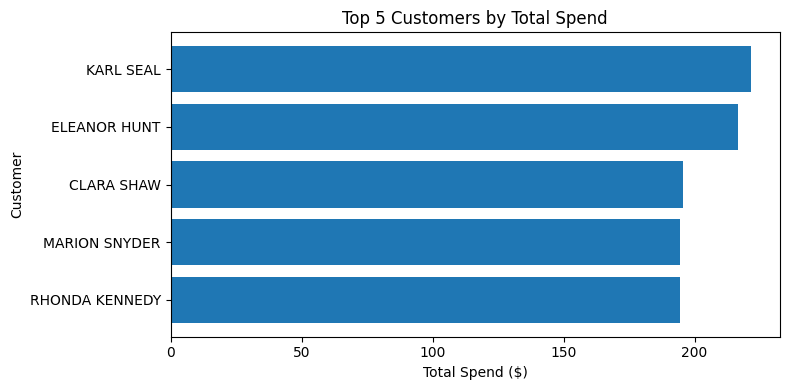

In [202]:
plt.figure(figsize=(8,4))
plt.barh(top5["customer"][::-1], top5["total_spend"][::-1])
plt.title("Top 5 Customers by Total Spend")
plt.xlabel("Total Spend ($)")
plt.ylabel("Customer")
plt.tight_layout()
plt.show()

b) - Revenue per film category - bar chart

In [203]:
rev_cat = query_sakila("""
    SELECT
        c.name AS category,
        ROUND(SUM(p.amount), 2) AS revenue
    FROM category c
    JOIN film_category fc ON fc.category_id = c.category_id
    JOIN film f ON f.film_id = fc.film_id
    JOIN inventory i ON i.film_id = f.film_id
    JOIN rental r ON r.inventory_id = i.inventory_id
    JOIN payment p ON p.rental_id    = r.rental_id
    GROUP BY c.name
    ORDER BY revenue DESC;
""")

rev_cat.head(10)  # small preview

,category,revenue
0,Sports,"5,314.21"
1,Sci-Fi,"4,756.98"
2,Animation,"4,656.30"
3,Drama,"4,587.39"
4,Comedy,"4,383.58"
5,Action,"4,375.85"
6,New,"4,351.62"
7,Games,"4,281.33"
8,Foreign,"4,270.67"
9,Family,"4,226.07"


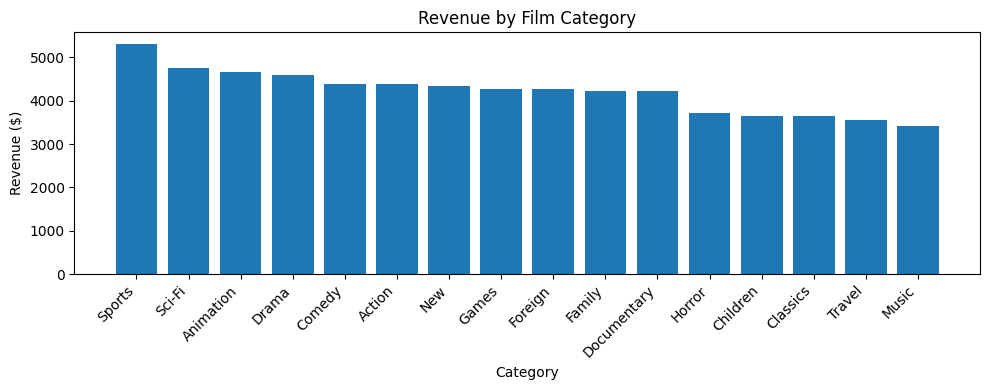

In [204]:
plt.figure(figsize=(10,4))
plt.bar(rev_cat["category"], rev_cat["revenue"])
plt.title("Revenue by Film Category")
plt.xlabel("Category")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()